# 앙상블
- 여러 개의 분류모델을 조합해서 더 나은 성능을 내는 방법



## RandomForest
: 의사결정트리 bagging(단일 모델 조합)해서 예측을 실행하는 모델

In [11]:
# begging 단일 모델의 조합
# 랜덤포레스트는 의사결정나무를 begging 한 것

In [4]:
from sklearn import datasets

import numpy as np
np.random.seed(5)

In [5]:
# 손글씨 데이터 
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [6]:
# 의사결정 나무를 이용한 교차 검증 10번 실시
from sklearn import tree
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier()
cv_scores = []

for i in range(0,10):
    cvs = cross_val_score(
        clf,
        features,
        labels,
        cv=10,
        scoring='accuracy'
    )
    cv_scores.append(cvs.mean())

cv_scores

[0.8280229671011794,
 0.8235630043451273,
 0.8224674115456239,
 0.8235692116697703,
 0.8341464928615766,
 0.8185692116697704,
 0.8241247672253259,
 0.8180136561142148,
 0.8235630043451272,
 0.8258038485412786]

In [7]:
np.mean(cv_scores)

0.8241843575418993

In [10]:
# RandomForest를 이용한 교차검증 10번
from sklearn.ensemble import RandomForestClassifier

cv_scores = []

rf_clf = RandomForestClassifier()

for i in range(10):
    scores = cross_val_score(
        rf_clf,
        features,
        labels,
        cv=10,
        scoring='accuracy'
    )
    cv_scores.append(scores.mean())

cv_scores


[0.9526939788950962,
 0.9487957790192427,
 0.9510211049037863,
 0.9549286157666046,
 0.9471322160148976,
 0.9487988826815641,
 0.952122905027933,
 0.9454531346989447,
 0.9460180012414648,
 0.9471322160148976]

In [36]:
def cross_validation(model,features,labels):

    cv_scores= []

    for i in range(0,10):
        score = cross_val_score(
            model,
            features,
            labels,
            cv=10,
            scoring='accuracy'
        )

        cv_scores.append(score.mean())
    
    return cv_scores

In [40]:
# 의사결정 나무
dt_cv_scores = cross_validation(clf, features , labels)
dt_cv_scores

[0.8291278708876474,
 0.8308069522036003,
 0.8297051520794538,
 0.8330229671011793,
 0.8246865301055246,
 0.8297020484171321,
 0.8291216635630043,
 0.8235599006828057,
 0.8263469894475481,
 0.8302482929857231]

In [39]:
# RandomForest
rf_cv_scores = cross_validation(rf_clf, features , labels)
rf_cv_scores 

[0.9499224084419614,
 0.9488081936685289,
 0.9448975791433891,
 0.9476846679081316,
 0.9482371198013656,
 0.9515735567970204,
 0.9454469273743016,
 0.9515735567970204,
 0.9543699565487275,
 0.9476908752327746]

### 랜덤포레스트와 의사결정나무의 정확도의 시각화

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
cv_list = {'random_forest': rf_cv_scores, 'decision_tree': dt_cv_scores}
df = pd.DataFrame(cv_list)

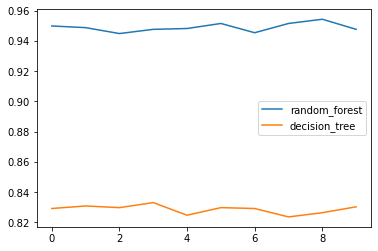

In [45]:
df.plot()
plt.show()

---
# 보팅(voting) 앙상블
: 단일 모델을 앙상블하여 더 나은 예측을 하는 모델 생성

### 단일 모델 정확도 측정

In [53]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test =  train_test_split(features,labels,stratify=labels , test_size=0.2)

In [54]:
# 의사결정 나무 
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

dtree_score = dtree.score(X_test,y_test)
print("d-tree :", dtree_score)


d-tree : 0.8722222222222222


0.8722222222222222

In [56]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train,y_train)

knn_score = knn.score(X_test,y_test)
print('knn_score :',knn_score)

knn_score : 0.9916666666666667


In [67]:
# SVM
from sklearn.svm import SVC
svm = SVC(probability=True).fit(X_train,y_train)
svm_score = svm.score(X_test,y_test)
print("SVM :",svm_score)

SVM : 0.9888888888888889


### 하드 보팅
: 각각의 분류기의 예측값을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식 입니다.

In [65]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators = [('decision_tree', dtree), ('knn',knn), ('svm',svm)],
    weights = [1,1,1],
    voting = 'hard'
).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9944444444444445

### 소프트 보팅
: 각각의 분류모델을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종결론을 내는 방식 입니다.


In [68]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators = [('decision_tree', dtree), ('knn',knn), ('svm',svm)],
    weights = [1,1,1],
    voting = 'soft'
).fit(X_train, y_train)

voting_clf.score(X_test, y_test)

0.9916666666666667